<a href="https://colab.research.google.com/github/JeongCheolHee/Deeplearning-analysis/blob/main/%EB%94%A5%EB%B6%84_5%EC%A3%BC%EC%B0%A8_%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("Hello Colab!!!")

Hello Colab!!!


In [ ]:
#운영체제 확인
import platform
print(platform.platform())

Linux-5.10.147+-x86_64-with-glibc2.31


In [ ]:
#텐서플로 불러오기
import tensorflow as tf
print(tf.__version__)

2.12.0


In [ ]:
#랜덤한 수 얻기(균일 분포)
rand = tf.random.uniform([2,3],0,1) #shape, min, max
print(rand)

tf.Tensor(
[[0.8723812  0.52767026 0.57903755]
 [0.79095745 0.3244586  0.5438585 ]], shape=(2, 3), dtype=float32)


In [ ]:
#정규 분포 랜덤
rand = tf.random.normal([3],0,1)
print(rand)

tf.Tensor([ 0.40308788 -1.0880208  -0.06309535], shape=(3,), dtype=float32)


In [ ]:
? tf.random.normal

In [ ]:
#seed로 값 고정
tf.random.set_seed(1)
rand = tf.random.normal([3],0,1)
print(rand)

tf.Tensor([-1.1012203  1.5457517  0.383644 ], shape=(3,), dtype=float32)


In [ ]:
#sigmoid 함수 
import math
def sigmoid(x) : 
  return 1/(1+math.exp(-x))
print(sigmoid(2))

0.8807970779778823


In [ ]:
#뉴런 입력 출력 정의
x = 1  #입력
y = 0 
w = tf.random.normal([1],0,1)
print(w)
print(sigmoid(x*w))
#Gradient Desecent Method
for i in range(1000):
  output = sigmoid(x*w)
  error = y - output
  alpha = 0.5 #학습률
  w = w + alpha * error * (output) * (1 - output) * x 

  if i % 100 == 99 :
    print(i, error, output)

tf.Tensor([-0.00839665], shape=(1,), dtype=float32)
0.4979008505983275
99 -0.12290171969186438 0.12290171969186438
199 -0.0822741585448816 0.0822741585448816
299 -0.0653898973985215 0.0653898973985215
399 -0.05569861423126152 0.05569861423126152
499 -0.0492507632290872 0.0492507632290872
599 -0.044578512252524134 0.044578512252524134
699 -0.04099860535194666 0.04099860535194666
799 -0.03814569314329547 0.03814569314329547
899 -0.03580468007817552 0.03580468007817552
999 -0.03383984916104819 0.03383984916104819


In [ ]:
#뉴런 입력 출력 정의
x = 0  #입력
y = 1 
w = tf.random.normal([1],0,1)
print(w)
print(sigmoid(x*w))
#Gradient Desecent Method
for i in range(1000):
  output = sigmoid(x*w)
  error = y - output
  alpha = 0.5 #학습률
  w = w + alpha * error * (output) * (1 - output) * x 

  if i % 100 == 99 :
    print(i, error, output)

#변화가 업음 => 해결하기 위해 Bias 추가
x = 0  #입력
y = 1 
w = tf.random.normal([1],0,1)
b = tf.random.normal([1],0,1) #intercept 추가 
print(w)
print(sigmoid(x*w+b))
#Gradient Desecent Method
for i in range(1000):
  output = sigmoid(x*w+b)
  error = y - output
  alpha = 0.5 #학습률
  w = w + alpha * error * (output) * (1 - output) * x 
  b = b + alpha * error * (output) * (1 - output) * 1

  if i % 100 == 99 :
    print(i, error, output)

tf.Tensor([0.32312542], shape=(1,), dtype=float32)
0.5
99 0.5 0.5
199 0.5 0.5
299 0.5 0.5
399 0.5 0.5
499 0.5 0.5
599 0.5 0.5
699 0.5 0.5
799 0.5 0.5
899 0.5 0.5
999 0.5 0.5
tf.Tensor([-1.1702181], shape=(1,), dtype=float32)
0.6305794018032087
99 0.11632872241022196 0.883671277589778
199 0.08004135086152964 0.9199586491384704
299 0.06421330995817953 0.9357866900418205
399 0.054951775376779644 0.9450482246232204
499 0.048725449459831705 0.9512745505401683
599 0.044184127404785944 0.9558158725952141
699 0.040688970321041906 0.9593110296789581
799 0.03789446928569984 0.9621055307143002
899 0.03559564650909741 0.9644043534909026
999 0.03366248688916196 0.966337513110838


In [2]:
#AND 연산 / OR 연산 / XOR 연산
a = [1,2,3,4]
a*2
import numpy as np
b = np.array([1,2,3,4])
b*2
#x = np.array([[1,1], [1,0],[0,1],[0,0]]) ; print(x) #AND
#y = np.array([[1],[0],[0],[0]]) ; print(y) #AND
#x = np.array([[1,1], [1,0],[0,1],[0,0]]) ; print(x) #or
#y = np.array([[1],[1],[1],[0]]) ; print(y) #or
x = np.array([[1,1], [1,0],[0,1],[0,0]]) ; print(x) #XOR
y = np.array([[0],[1],[1],[0]]) ; print(y) #XOR

w = tf.random.normal([2], 0, 1) #weight 2차원
b = tf.random.normal([1],0,1)
for i in range(2000):
  error_sum = 0 
  for j in range(4): #input이 4개이므로
    output = sigmoid(np.sum(x[j] * w)+b)
    error = y[j][0] - output
    alpha = 0.5
    w = w + alpha * error *output * (1-output) * x[j]  #vector 
    b = b + alpha * error *output * (1-output)  #scalar
    error_sum = error_sum + error

  if i % 200 == 199:
      print(i, error_sum)

[[1 1]
 [1 0]
 [0 1]
 [0 0]]
[[0]
 [1]
 [1]
 [0]]


NameError: ignored

In [ ]:
#AND/OR/XOR 네트워크의 평가
for i in range(4):
  print('X: ', x[i], 'Y: ',y[i], 'output : ',sigmoid(np.sum(x[i]*w)+b))

X:  [1 1] Y:  [0] output :  0.5161059805294979
X:  [1 0] Y:  [1] output :  0.5161059954151974
X:  [0 1] Y:  [1] output :  0.4999999925494194
X:  [0 0] Y:  [0] output :  0.5000000074505806


In [3]:
#tf.keras를 이용하여 XOR 네트워크 연산
import tensorflow as tf
import numpy as np
x = np.array([[1,1], [1,0],[0,1],[0,0]]) ; print(x) #XOR
y = np.array([[0],[1],[1],[0]]) ; print(y) #XOR

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 2, activation = 'sigmoid', input_shape =(2,)),
    tf.keras.layers.Dense(units = 1, activation = 'sigmoid')
])

model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.5), loss = 'mse')

model.summary()

[[1 1]
 [1 0]
 [0 1]
 [0 0]]
[[0]
 [1]
 [1]
 [0]]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [4]:
history = model.fit(x,y, epochs = 2000, batch_size = 1)

Epoch 1/2000
4/4 [==============================] - 1s 7ms/step - loss: 0.2742
Epoch 2/2000
4/4 [==============================] - 0s 7ms/step - loss: 0.2767
Epoch 3/2000
4/4 [==============================] - 0s 7ms/step - loss: 0.2744
Epoch 4/2000
4/4 [==============================] - 0s 8ms/step - loss: 0.2768
Epoch 5/2000
4/4 [==============================] - 0s 6ms/step - loss: 0.2765
Epoch 6/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.2739
Epoch 7/2000
4/4 [==============================] - 0s 7ms/step - loss: 0.2764
Epoch 8/2000
4/4 [==============================] - 0s 8ms/step - loss: 0.2734
Epoch 9/2000
4/4 [==============================] - 0s 8ms/step - loss: 0.2761
Epoch 10/2000
4/4 [==============================] - 0s 5ms/step - loss: 0.2761
Epoch 11/2000
4/4 [==============================] - 0s 5ms/step - loss: 0.2761
Epoch 12/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.2731
Epoch 13/2000
4/4 [==============================

In [5]:
model.predict(x)

1/1 [==============================] - 0s 194ms/step


array([[0.03142343],
       [0.96949315],
       [0.9697287 ],
       [0.03528487]], dtype=float32)

In [6]:
print(model.weights)

[<tf.Variable 'dense/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[ 5.3346505, -5.691799 ],
       [-5.548241 ,  5.539323 ]], dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(2,) dtype=float32, numpy=array([-2.990905 , -3.1195052], dtype=float32)>, <tf.Variable 'dense_1/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[8.225954],
       [8.181472]], dtype=float32)>, <tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([-4.0480523], dtype=float32)>]


In [8]:
dir(model) #model 안에 어떤 function이름이나 variable 들을 알 수 있음

['_SCALAR_UPRANKING_ON',
 '_TF_MODULE_IGNORED_PROPERTIES',
 '__call__',
 '__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activity_regularizer',
 '_add_trackable',
 '_add_trackable_child',
 '_add_variable_with_custom_getter',
 '_assert_compile_was_called',
 '_assert_weights_created',
 '_auto_get_config',
 '_auto_track_sub_layers',
 '_autocast',
 '_autographed_call',
 '_base_model_initialized',
 '_build_graph_network_for_inferred_shape',
 '_build_input_shape',
 '_call_spec',
 '_callable_losses',
 '_captured_weight_regularizer',
 '_cast_single_input',
 '_check_call_args',
 '_check_sample_weight_warning',
 '_

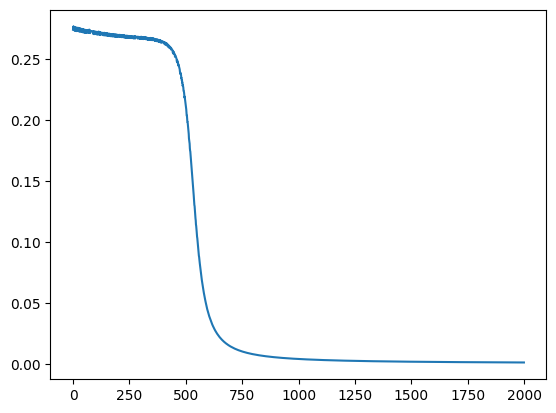

In [10]:
import matplotlib.pyplot as plt   
plt.plot(history.history['loss']) #epohc 2000번?